# Variables Categóricas

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(color_codes=True)

In [48]:
df = pd.read_csv('weight-height.csv')

In [49]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


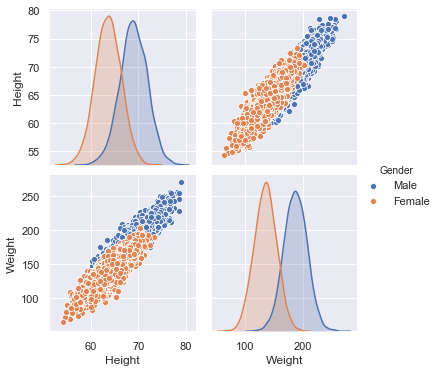

In [50]:
sns.pairplot(data=df, hue='Gender')

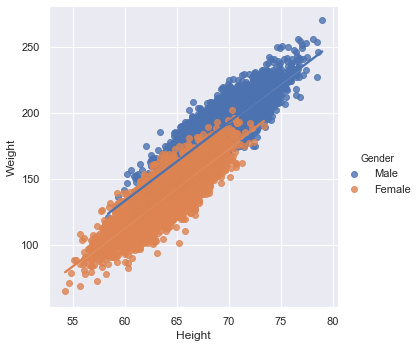

In [51]:
sns.lmplot(data=df, x='Height', y='Weight', hue='Gender')

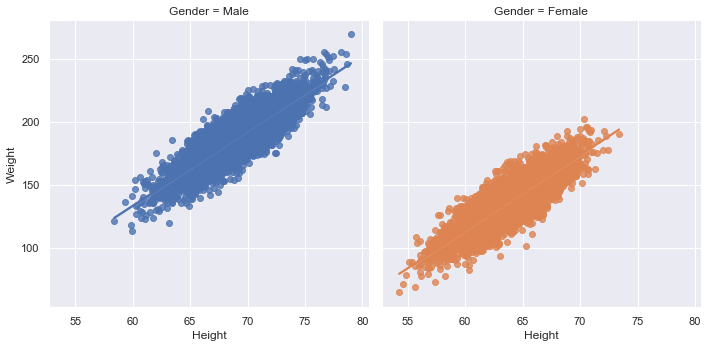

In [52]:
sns.lmplot(data=df, x="Height", y="Weight", col="Gender", hue='Gender')

In [53]:
df = pd.get_dummies(df, drop_first=True)

In [54]:
df.head(2)

,Height,Weight,Gender_Male
0,73.847017,241.893563,1
1,68.781904,162.310473,1


In [55]:
import statsmodels.formula.api as sm

In [56]:
lm1 = sm.ols(formula='Weight ~ Height', data=df).fit()
lm1.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                  Results: Ordinary least squares
===================================================================
Model:              OLS              Adj. R-squared:     0.855     
Dependent Variable: Weight           AIC:                78441.9113
Date:               2020-06-25 23:50 BIC:                78456.3319
No. Observations:   10000            Log-Likelihood:     -39219.   
Df Model:           1                F-statistic:        5.904e+04 
Df Residuals:       9998             Prob (F-statistic): 0.00      
R-squared:          0.855            Scale:              149.32    
-------------------------------------------------------------------
              Coef.   Std.Err.     t     P>|t|    [0.025    0.975] 
-------------------------------------------------------------------
Intercept   -350.7372   2.1115 -166.1092 0.0000 -354.8761 -346.5983
Height         7.7173   0.0318  242.9746 0.0000    7.6550    7.7795
-------------------------------------------------------------------
Omnibus:                2.141        Durbin-Watson:           1.677
Prob(Omnibus):          0.343        Jarque-Bera (JB):        2.150
Skew:                   0.036        Prob(JB):                0.341
Kurtosis:               2.991        Condition No.:           1149 
===================================================================
* The condition number is large (1e+03). This might indicate
strong multicollinearity or other numerical problems.
"""

In [57]:
lm2 = sm.ols(formula='Weight ~ Height + Gender_Male', data=df).fit()
lm2.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                  Results: Ordinary least squares
===================================================================
Model:              OLS              Adj. R-squared:     0.903     
Dependent Variable: Weight           AIC:                74461.6334
Date:               2020-06-25 23:50 BIC:                74483.2644
No. Observations:   10000            Log-Likelihood:     -37228.   
Df Model:           2                F-statistic:        4.640e+04 
Df Residuals:       9997             Prob (F-statistic): 0.00      
R-squared:          0.903            Scale:              100.28    
-------------------------------------------------------------------
              Coef.   Std.Err.     t     P>|t|    [0.025    0.975] 
-------------------------------------------------------------------
Intercept   -244.9235   2.2986 -106.5525 0.0000 -249.4293 -240.4177
Height         5.9769   0.0360  165.9729 0.0000    5.9064    6.0475
Gender_Male   19.3777   0.2771   69.9311 0.0000   18.8345   19.9209
-------------------------------------------------------------------
Omnibus:                0.464        Durbin-Watson:           2.016
Prob(Omnibus):          0.793        Jarque-Bera (JB):        0.447
Skew:                   0.016        Prob(JB):                0.800
Kurtosis:               3.011        Condition No.:           1531 
===================================================================
* The condition number is large (2e+03). This might indicate
strong multicollinearity or other numerical problems.
"""

In [58]:
df_m = df[df['Gender_Male']==1]
df_f = df[df['Gender_Male']==0]

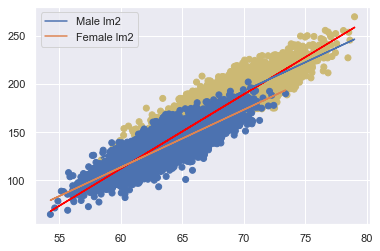

In [66]:
plt.scatter(df['Height'], df['Weight'], c=df['Gender_Male'].map({0:'b',1:'y'}))
plt.plot(df['Height'], lm1.predict(df['Height']), c='red')
plt.plot(df_m['Height'], lm2.predict(df_m[['Height','Gender_Male']]), label='Male lm2')
plt.plot(df_f['Height'], lm2.predict(df_f[['Height','Gender_Male']]), label='Female lm2')
plt.legend()

In [ ]:
sns.regplot(data=df, x='Height', y='Weight')